> L'**analyse exploratoire** du notebook est largement inspiré du fichier [kaggle](https://www.kaggle.com/sanjaylalwani/spaceship-titanic-eda)

## Présentation des données

In [1]:
# importation des bibliothèques sachant que les packages sont installés en amont sur anaconda

import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix
from sklearn import preprocessing    

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
%matplotlib inline 

In [2]:
# Import du dataset de training et présentation des données

df = pd.read_csv("titanic_dataset/train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [3]:
# Import du dataset de training et présentation des données

df2 = pd.read_csv("titanic_dataset/test.csv")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [4]:
df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
# Analyse statistique

df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
n = df.nunique(axis=0)  
print("Valeurs uniques contenues dans chaque variable :\n", n)

Valeurs uniques contenues dans chaque variable :
 PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64


## Analyse exploratoire

Text(0.5, 1.0, 'Proportion de passagers transportés')

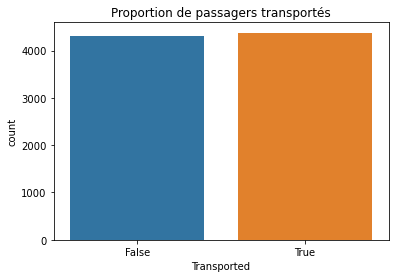

In [7]:
sns.countplot(x="Transported", data=df)
plt.title("Proportion de passagers transportés")

Text(0.5, 1.0, 'Proportion de passagers en cryosommeil')

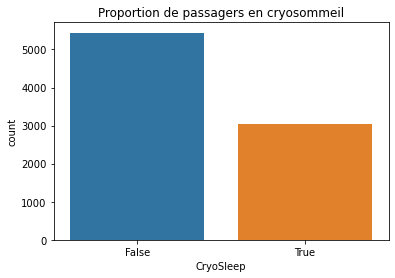

In [8]:
sns.countplot(x="CryoSleep", data=df)
plt.title("Proportion de passagers en cryosommeil")

Text(0.5, 1.0, 'Proportion du nombre de VIP')

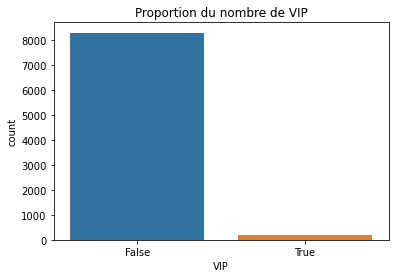

In [9]:
sns.countplot(x="VIP", data=df)
plt.title("Proportion du nombre de VIP")

Text(0.5, 1.0, 'Proportion de personne transportées par planètes ')

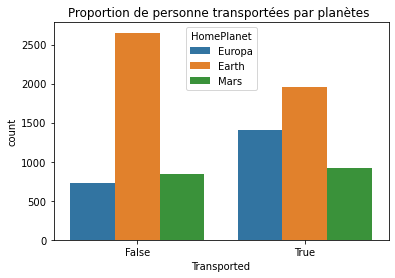

In [10]:
sns.countplot(x="Transported",hue="HomePlanet", data=df)
plt.title("Proportion de personne transportées par planètes ")

Text(0.5, 1.0, 'Passagers transportés selon leurs âges')

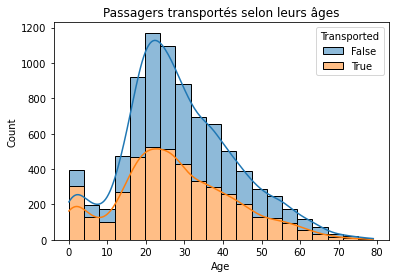

In [11]:
sns.histplot(x='Age', hue='Transported', data=df, bins=20, multiple="stack", kde=True)
plt.title("Passagers transportés selon leurs âges")

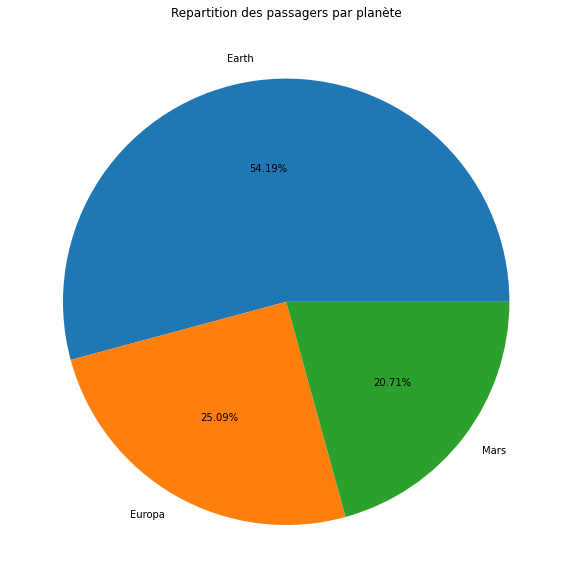

In [12]:
plt.figure(figsize=(10,20))
plt.pie(x=df['HomePlanet'].value_counts(),labels=df['HomePlanet'].value_counts().index, autopct='%0.2f%%')
plt.title("Repartition des passagers par planète")
plt.show()


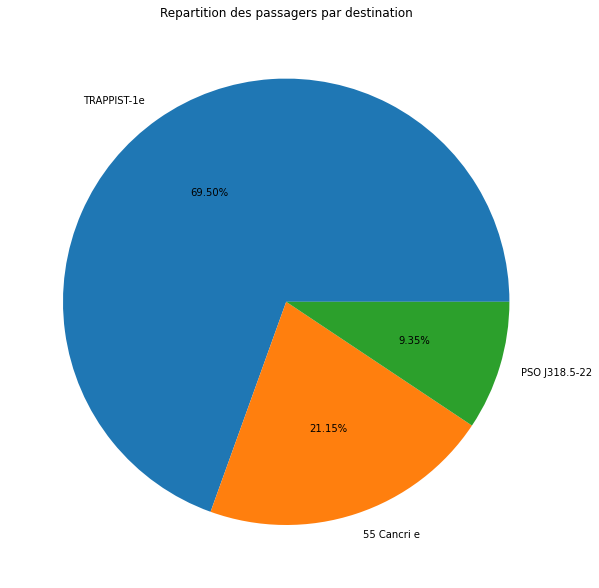

In [13]:
plt.figure(figsize=(10,20))
plt.pie(x=df['Destination'].value_counts(),labels=df['Destination'].value_counts().index, autopct='%0.2f%%')
plt.title("Repartition des passagers par destination")
plt.show()


# Traitement des variables

### Traitement des doublons

In [14]:
# présence de doublons ou pas
df[df["Name"].duplicated()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
58,0064_01,Mars,True,F/14/S,TRAPPIST-1e,15.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True
65,0069_01,Earth,False,F/16/S,TRAPPIST-1e,42.0,False,887.0,0.0,9.0,6.0,0.0,NaN,True
77,0082_03,Mars,False,F/16/P,TRAPPIST-1e,8.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True
101,0108_02,Earth,False,G/19/S,TRAPPIST-1e,31.0,False,562.0,0.0,326.0,0.0,0.0,NaN,False
126,0136_01,Earth,False,G/23/S,PSO J318.5-22,47.0,False,97.0,418.0,126.0,25.0,55.0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8629,9205_02,Europa,True,B/300/P,TRAPPIST-1e,15.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True
8631,9208_01,Earth,True,G/1485/S,TRAPPIST-1e,35.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True
8636,9218_01,Europa,True,B/353/S,55 Cancri e,43.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True
8652,9230_01,Europa,False,C/342/S,TRAPPIST-1e,36.0,True,0.0,5600.0,715.0,2868.0,971.0,NaN,True


> On remarqu'il ya des noms avec des valeurs manquantes, testons maintenant avec le PassengerId

In [15]:
df[df["PassengerId"].duplicated()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported


> Il n'y a pas de ligne dupliquée.

In [16]:
# Faisons la même procédure aux données de validation
df2[df2["PassengerId"].duplicated()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name


### Traitement des outliers

<AxesSubplot:xlabel='FoodCourt'>

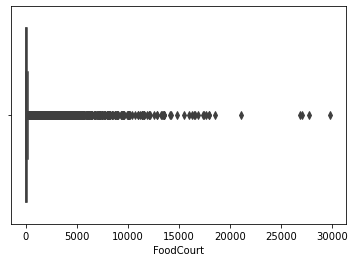

In [17]:
sns.boxplot(x='FoodCourt',data=df)

<AxesSubplot:xlabel='VRDeck'>

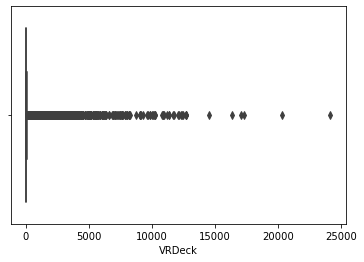

In [18]:
sns.boxplot(x='VRDeck',data=df)

<AxesSubplot:xlabel='Spa'>

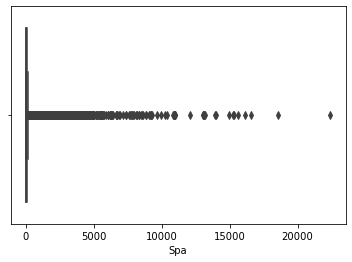

In [19]:
sns.boxplot(x='Spa',data=df)

<AxesSubplot:xlabel='ShoppingMall'>

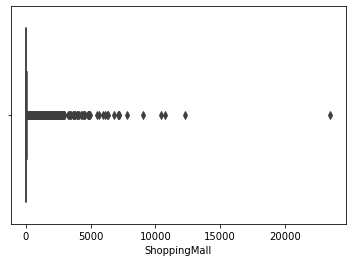

In [20]:
sns.boxplot(x='ShoppingMall',data=df)

<AxesSubplot:xlabel='Age'>

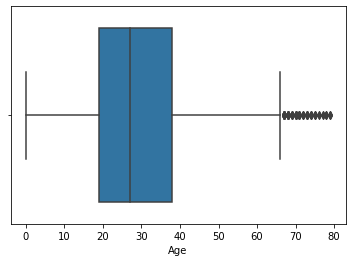

In [21]:
sns.boxplot(x='Age',data=df)

<AxesSubplot:xlabel='RoomService'>

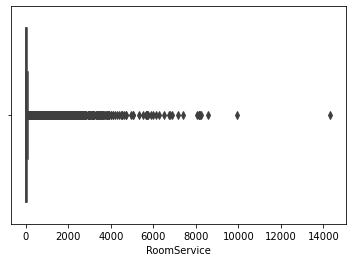

In [22]:
sns.boxplot(x='RoomService',data=df)

In [23]:
# Définition d'une fonction qui permettra de remplacer les outliers par la valeur médiane

def gestion_outliers(data, liste):
    "En entrée on a un dataframe et une liste de variable"
    "En sortie on obtiendra les outliers de la liste de variable remplacés par leurs médianes"
    
    for var in liste:
        Q1 = data.loc[data[var] != 0,var].quantile(.25)
        Q2 = data.loc[data[var] != 0,var].quantile(.50)
        Q3 = data.loc[data[var] != 0,var].quantile(.75)
        IQR = Q3 - Q1
        maxval = Q3 + 1.5*IQR
        minval = Q1 - 1.5*IQR
        data.loc[data[var] > maxval,var] = Q2
        data.loc[data[var] < minval,var] = Q2

In [24]:
# remplacement des outliers par la mediane liée à leurs variables

l1 = ["ShoppingMall", "Spa", "VRDeck", "FoodCourt", "Age", "RoomService"]
gestion_outliers(df, l1)
gestion_outliers(df2, l1)

### Traitement des valeurs manquantes

In [25]:
# déterminons les valeurs manquantes

df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [26]:
# j'ai decidé de supprimé tous les passagers dont on ne connait pas leurs planètes de provenance 
df1 = df.copy()
df1.dropna(subset = ["HomePlanet"], inplace = True)
df3 = df2.copy()
df3.dropna(subset = ["HomePlanet"], inplace = True)

In [27]:
# ré-examinons les variables manquantes
df1.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep       215
Cabin           193
Destination     178
Age             177
VIP             200
RoomService     175
FoodCourt       181
ShoppingMall    201
Spa             180
VRDeck          187
Name            193
Transported       0
dtype: int64

In [28]:
# La majorité des passagers sont en cryosommeil

df1['CryoSleep']= df1['CryoSleep'].fillna(False)
df3['CryoSleep']= df3['CryoSleep'].fillna(False)

In [29]:
df1["Cabin"]

0          B/0/P
1          F/0/S
2          A/0/S
3          A/0/S
4          F/1/S
          ...   
8688      A/98/P
8689    G/1499/S
8690    G/1500/S
8691     E/608/S
8692     E/608/S
Name: Cabin, Length: 8492, dtype: object

In [30]:
# on a garder juste la première lettre du numero de cabine

df1['Cabin']= df1.apply(lambda x: x['Cabin'] if pd.isnull(x['Cabin']) else x['Cabin'][0:1], axis=1)

Text(0.5, 1.0, 'Proportion par cabines')

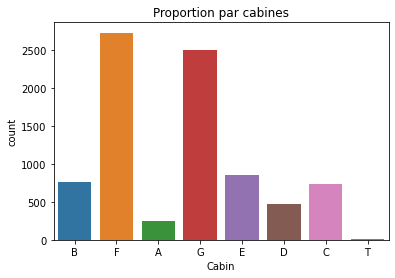

In [31]:
sns.countplot(x="Cabin", data=df1)
plt.title("Proportion par cabines")

In [32]:
# j'ai pas assez d'éléments pour faire un choix sur les passagers n'ayant pas de cabines
# donc je vais simplement supprimer cette variables

df1.drop(columns = ["Cabin"], inplace = True)
df3.drop(columns = ["Cabin"], inplace = True)

In [33]:
df1

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,396.5,0.0,226.5,49.0,Altark Susent,False
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,226.5,193.0,Solam Susent,False
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,396.5,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,195.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,260.0,Celeon Hontichre,False


In [34]:
# nous remarquons que la destination la plus convoitée est TRAPPIST-1e

df1['Destination']= df1['Destination'].fillna("TRAPPIST-1e")
df3['Destination']= df3['Destination'].fillna("TRAPPIST-1e")

In [35]:
# remplaçons les valeurs manquantes des variables numériques par leurs valeurs moyennes:

l1 = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "Age"]
for var in l1:
    df1[var]= df1[var].fillna(df1[var].mean())
    df3[var]= df3[var].fillna(df3[var].mean())
    

In [36]:
df1.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP             200
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            193
Transported       0
dtype: int64

In [37]:
# La majorité des passagers sont des Non-VIP

df1['VIP']= df1['VIP'].fillna(False)
df3['VIP']= df3['VIP'].fillna(False)

In [38]:
# Supprimons la colonne Name

df1.drop(columns=["Name"], inplace = True)
df3.drop(columns=["Name"], inplace = True)

In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8492 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8492 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8492 non-null   bool   
 3   Destination   8492 non-null   object 
 4   Age           8492 non-null   float64
 5   VIP           8492 non-null   bool   
 6   RoomService   8492 non-null   float64
 7   FoodCourt     8492 non-null   float64
 8   ShoppingMall  8492 non-null   float64
 9   Spa           8492 non-null   float64
 10  VRDeck        8492 non-null   float64
 11  Transported   8492 non-null   bool   
dtypes: bool(3), float64(6), object(3)
memory usage: 1008.3+ KB


In [40]:
df1.reset_index(inplace = True, drop = True)
df3.reset_index(inplace = True, drop = True)

In [41]:
# sauvegardons les dataset cleané

df1.to_csv("titanic_clean.csv")
df3.to_csv("titanic_validation.csv")